<a href="https://colab.research.google.com/github/samridhi2004/AIMLMonth2023/blob/main/MAJORPROJECT_SST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving dataset.csv to dataset (1).csv


In [ ]:
from google.colab import files
uploaded = files.upload()



Saving PyAudio-0.2.11-cp310-cp310-win_amd64.whl to PyAudio-0.2.11-cp310-cp310-win_amd64.whl


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving stock.jpg to stock.jpg


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving dataset.csv to dataset.csv


In [ ]:
!python -m pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
!pip install ipywidgets


  Obtaining dependency information for jedi>=0.16 from https://files.pythonhosted.org/packages/8e/46/7e3ae3aa2dcfcffc5138c6cef5448523218658411c84a2000bf75c8d3ec1/jedi-0.19.0-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.5 MB/s eta 0:00:00


In [ ]:
#(1) Security: Train model to detect intruders on camera

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
import pandas as pd
import os
from ipywidgets import FileUpload  # Import FileUpload from IPython widgets
from IPython.display import display

# Initialize empty lists for image paths and labels
image_paths = []
labels = []

# Define a data generator for loading and augmenting images
datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Rescale pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define the model architecture (you can customize this)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification (intruder or not)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create a file upload widget
upload = FileUpload(accept='.jpg', multiple=True)

# Display the file upload widget
display(upload)

# Process uploaded images and train the model
def process_uploaded_images(change):
    uploaded_files = upload.value

    for filename, file_info in uploaded_files.items():
        # Save the uploaded file to a temporary location
        with open(filename, 'wb') as f:
            f.write(file_info['content'])

        image_paths.append(filename)

    # Use the image_paths list in your code for further processing
    print("Uploaded image paths:", image_paths)

    # Ensure the image files exist
    for img_path in image_paths:
        if not os.path.isfile(img_path):
            raise FileNotFoundError(f"Image file not found: {img_path}")

    # Collect labels for the uploaded images
    # You should customize this part to collect labels for each image
    # For example, you can load labels from a predefined list

    # Example: Predefined list of labels corresponding to the uploaded images
    predefined_labels = ['1', '0', '1', '0', '1']

    # Ensure the number of labels matches the number of uploaded images
    if len(predefined_labels) != len(image_paths):
        raise ValueError("Number of labels does not match the number of uploaded images.")

    # Add predefined labels to the labels list
    labels.extend(predefined_labels)

    # Example: Train the model using the uploaded images and labels (replace this with your own logic)
    batch_size = 32
    epochs = 10

    train_generator = datagen.flow_from_dataframe(
        dataframe=pd.DataFrame({'Image_Path': image_paths, 'Label': labels}),
        x_col='Image_Path',
        y_col='Label',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='binary'
    )

    # Compile the model before training
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(train_generator, epochs=epochs)

    # Save the trained model
    model.save("intruder_detection_model.h5")

    # Intruder detection for uploaded images
    threshold = 0.6  # Adjust the threshold as needed

    for img_path, label in zip(image_paths, labels):
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = image / 255.0
        image = np.expand_dims(image, axis=0)
        prediction = model.predict(image)

        # Check if the prediction indicates an intruder
        if prediction > threshold:
            print(f"Intruder detected in {img_path} with label {label}")
        else:
            print(f"No intruder detected in {img_path} with label {label}")

# Observe changes in the file upload widget
upload.observe(process_uploaded_images, names='value')


FileUpload(value={}, accept='.jpg', description='Upload', multiple=True)

Uploaded image paths: ['stock9.jpg', 'stock4.jpg', 'stock3.jpg', 'stock2.jpg', 'stock.jpg']
Found 5 validated image filenames belonging to 2 classes.
Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.6943 - accuracy: 0.4000
Epoch 2/10
1/1 [==============================] - 1s 751ms/step - loss: 0.8367 - accuracy: 0.8000
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 1.2923 - accuracy: 0.6000
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 1.2020 - accuracy: 0.6000
Epoch 5/10
1/1 [==============================] - 1s 685ms/step - loss: 0.7707 - accuracy: 0.4000
Epoch 6/10
1/1 [==============================] - 1s 688ms/step - loss: 0.6685 - accuracy: 0.8000
Epoch 7/10
1/1 [==============================] - 1s 682ms/step - loss: 0.6964 - accuracy: 0.4000
Epoch 8/10
1/1 [==============================] - 1s 672ms/step - loss: 0.6857 - accuracy: 0.6000
Epoch 9/10
1/1 [==============================] - 1s 665ms/step - loss: 0.7

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 106ms/step
No intruder detected in stock9.jpg with label 1
1/1 [==============================] - 0s 51ms/step
No intruder detected in stock4.jpg with label 0
1/1 [==============================] - 0s 44ms/step
No intruder detected in stock3.jpg with label 1
1/1 [==============================] - 0s 44ms/step
No intruder detected in stock2.jpg with label 0
1/1 [==============================] - 0s 45ms/step
No intruder detected in stock.jpg with label 1


In [ ]:
#(2)Statement: Identify and prevent water leaks.

In [ ]:
pip install Faker


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.8 MB/s eta 0:00:00


In [ ]:
#(2)Statement: Identify and prevent water leaks.

In [ ]:
import pandas as pd
import numpy as np
from faker import Faker  # To generate fake data

# Generate synthetic data
fake = Faker()
np.random.seed(0)

num_samples = 100
locations = [fake.city() for _ in range(num_samples)]
leak_probabilities = np.random.uniform(0, 1, num_samples)
sensor_readings = np.random.normal(0, 1, num_samples)
timestamps = pd.date_range(start='2023-09-01', periods=num_samples, freq='H')

# Create a DataFrame
data = {
    'Location': locations,
    'Leak_Probability': leak_probabilities,
    'Sensor_Reading': sensor_readings,
    'Timestamp': timestamps
}

df = pd.DataFrame(data)

# Sample data
print(df.head())

# Analysis
leak_threshold = 0.5  # Adjust the threshold as needed
leak_detected = df['Leak_Probability'] > leak_threshold
leak_count = leak_detected.sum()

print(f"Number of leaks detected: {leak_count}")

# Prevention (simplified)
def prevent_leak(location):
    # Replace this with your prevention logic
    return f"Water leak prevented at {location}"

df['Prevention_Action'] = df.apply(lambda row: prevent_leak(row['Location']) if row['Leak_Probability'] > leak_threshold else 'No action needed', axis=1)

# Sample data with prevention actions
print(df.head())


             Location  Leak_Probability  Sensor_Reading           Timestamp
0  Port Connorchester          0.548814       -1.165150 2023-09-01 00:00:00
1         Robertmouth          0.715189        0.900826 2023-09-01 01:00:00
2      New Brentshire          0.602763        0.465662 2023-09-01 02:00:00
3           Port Sean          0.544883       -1.536244 2023-09-01 03:00:00
4           Moonhaven          0.423655        1.488252 2023-09-01 04:00:00
Number of leaks detected: 49
             Location  Leak_Probability  Sensor_Reading           Timestamp  \
0  Port Connorchester          0.548814       -1.165150 2023-09-01 00:00:00   
1         Robertmouth          0.715189        0.900826 2023-09-01 01:00:00   
2      New Brentshire          0.602763        0.465662 2023-09-01 02:00:00   
3           Port Sean          0.544883       -1.536244 2023-09-01 03:00:00   
4           Moonhaven          0.423655        1.488252 2023-09-01 04:00:00   

                            Prevention_A

In [ ]:
pip install comtypes


  Obtaining dependency information for comtypes from https://files.pythonhosted.org/packages/c2/a7/fe4bd49b5c4afa7a7ed3852abda6909e48c00715e6a134e47055381113aa/comtypes-1.2.0-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 3.2 MB/s eta 0:00:00


In [ ]:
pip install gTTS


In [ ]:
from gtts import gTTS
import os

# Function to speak text
def speak_text(text):
    tts = gTTS(text=text, lang='en')
    tts.save('temp.mp3')
    os.system('mpg123 temp.mp3')  # You may need to install mpg123: sudo apt-get install mpg123

# Usage:
speak_text("Turning on the lights in the kitchen.")



In [ ]:
#(3)Behavior-Based Recommendations: ML can analyze historical user behavior to provide recommendations for optimizing home systems. For example, it might suggest adjusting the thermostat by a few degrees to save energy without sacrificing comfort.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from joblib import dump

# Create a DataFrame with the sample dataset
data = {
    'Category': ['lights', 'lights', 'thermostat', 'thermostat', 'lights'],
    'Action_needed': [1, 1, 0, 0, 1],
    'Question': [0, 0, 1, 1, 0],
    'Subcategory': ['kitchen', 'kitchen', 'living_room', 'living_room', 'bathroom'],
    'Action': ['on', 'off', 'cool', 'warm', 'on'],
    'Time': ['today', 'tomorrow', 'today', 'tomorrow', 'hour'],
}

# Create a DataFrame from the data
dataset = pd.DataFrame(data)

# Perform one-hot encoding for categorical columns
dataset = pd.get_dummies(dataset, columns=['Category', 'Subcategory', 'Action', 'Time'], drop_first=True)

# Split the dataset into training and testing sets
X = dataset.drop(['Action_needed'], axis=1)
y = dataset['Action_needed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a machine learning model (Random Forest Classifier)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Save the trained model for future recommendations
dump(clf, 'recommendation_model.joblib')

# Function to provide recommendations based on user behavior
def get_recommendations(user_behavior):
    # user_behavior is a dictionary containing user behavior data
    # Example: {'Category': 'lights', 'Subcategory': 'kitchen', 'Action': 'on', 'Time': 'today'}

    # Create a DataFrame from user input and perform one-hot encoding
    user_df = pd.DataFrame([user_behavior])

    # Ensure that the input DataFrame has the same one-hot encoding columns as the training data
    missing_cols = set(X_train.columns) - set(user_df.columns)
    for col in missing_cols:
        user_df[col] = 0

    user_df = user_df[X_train.columns]  # Reorder columns to match training data

    # Make a recommendation using the trained model
    recommendation = clf.predict(user_df)[0]

    return recommendation

# Example usage:
user_behavior = {
    'Category': 'lights',
    'Subcategory': 'kitchen',
    'Action': 'on',
    'Time': 'today'
}

recommendation = get_recommendations(user_behavior)
if recommendation == 1:
    print("Recommendation: Adjust the lights in the kitchen.")
else:
    print("No specific action recommended.")


Accuracy: 1.00
Recommendation: Adjust the lights in the kitchen.


In [ ]:
#Voice Control: ML-driven NLP interfaces like voice assistants can enable users to control various home systems using natural language commands, making it convenient to adjust settings for comfort and energy efficiency.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import joblib
import pyttsx3  # For text-to-speech conversion
import speech_recognition as sr  # For speech recognition
import subprocess  # For executing actions in the system

# Load the dataset
dataset = pd.read_csv("dataset.csv")

# Data preprocessing
# Assuming you have labeled data with 'Sentence' as input and 'Action' as output
X = dataset['Sentence']
y = dataset['Action']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a classification model (e.g., Naive Bayes)
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

# Evaluate the model
y_pred = classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

# Save the trained model for later use
joblib.dump(classifier, "voice_assistant_model.pkl")
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")

# Initialize text-to-speech engine
engine = pyttsx3.init()

# Initialize speech recognition engine
recognizer = sr.Recognizer()

# Main voice control loop
while True:
    try:
        with sr.Microphone() as source:
            print("Listening for a command...")
            audio = recognizer.listen(source)
            command = recognizer.recognize_google(audio).lower()  # Convert speech to text

            if command == "stop":
                break  # Exit the loop if the user says "stop"

            # Preprocess the command text
            command_tfidf = tfidf_vectorizer.transform([command])

            # Predict the action using the trained model
            predicted_action = classifier.predict(command_tfidf)[0]

            # Perform the action based on the predicted action
            if predicted_action == 'on':
                subprocess.run(["turn_on_action"])  # Replace with the actual command for turning on
            elif predicted_action == 'off':
                subprocess.run(["turn_off_action"])  # Replace with the actual command for turning off

            # Speak the response
            response = f"Turning {predicted_action} the {predicted_device}."
            engine.say(response)
            engine.runAndWait()

    except sr.UnknownValueError:
        print("Could not understand the audio.")
    except sr.RequestError as e:
        print(f"Could not request results: {e}")

# Cleanup
engine.stop()


ModuleNotFoundError: ignored

In [ ]:
#(4)Adaptive Lighting: ML can analyze natural light levels, occupancy, and user preferences to adjust the brightness and color temperature of lighting fixtures throughout the day. This creates a comfortable and energy-efficient lighting environment.

In [ ]:
import pandas as pd
import numpy as np

# Create a DataFrame with the dataset
data = {
    "Room": ["Living Room", "Bedroom", "Kitchen", "Bathroom", "Dining Room"],
    "action": ["on", "on", "on", "on", "on"],
    "time": [
        "2023-09-10 05:30:00",
        "2023-09-10 07:45:00",
        "2023-09-10 18:30:00",
        "2023-09-10 22:15:00",
        "2023-09-10 20:00:00",
    ],
    "brightness": [80, 90, 100, 70, 85],  # Adjust brightness values as needed
}

df = pd.DataFrame(data)

# Get the current time
current_time = pd.to_datetime("2023-09-10 02:44:55")

# Calculate the time of sunrise and sunset
sunrise_time = current_time.replace(hour=6, minute=0, second=0)
sunset_time = current_time.replace(hour=18, minute=0, second=0)

# Create a dictionary to store the light settings for each room
light_settings = {}

# Iterate over the rows in the dataset
for index, row in df.iterrows():
    # Get the room name, action, and time
    room_name = row["Room"]
    action = row["action"]
    time = pd.to_datetime(row["time"])

    # If the action is "on", turn on the light
    if action == "on":
        # Get the brightness from the dataset
        brightness = row["brightness"]

        # Calculate the color temperature based on time of day
        if time < sunrise_time:
            color_temperature = 2700
        elif time < sunset_time:
            color_temperature = 3500
        else:
            color_temperature = 4500

        # Update the light settings dictionary
        light_settings[room_name] = {"brightness": brightness, "color_temperature": color_temperature}

# Print the light settings dictionary
print(light_settings)


{'Living Room': {'brightness': 80, 'color_temperature': 2700}, 'Bedroom': {'brightness': 90, 'color_temperature': 3500}, 'Kitchen': {'brightness': 100, 'color_temperature': 4500}, 'Bathroom': {'brightness': 70, 'color_temperature': 4500}, 'Dining Room': {'brightness': 85, 'color_temperature': 4500}}


In [ ]:
#(5)AI helps to train the ML for the lights in the kitchen .

In [ ]:
import pandas as pd

# Read the dataset
df = pd.read_csv("dataset.csv")

# Get the rows where the category is "lights" and the action is either "on" or "off" and the time is "today" or "tomorrow"
rows = df[
    (df["Category"] == "lights")
    & ((df["Action_needed"] == 1) | (df["Action_needed"] == 0))
    & ((df["Time"] == "today") | (df["Time"] == "tomorrow"))
]

# Convert the Sentence column to a list of lists
sentences = []
for index, row in rows.iterrows():
    sentences.append([word for word in row["Sentence"].split(" ")])

# Print the sentences
print("The following sentences can be used to control the lights in the kitchen today or tomorrow:")
for sentence in sentences:
    print(sentence)


The following sentences can be used to control the lights in the kitchen today or tomorrow:
['Illuminate', 'the', 'kitchen', 'today.']
['Illuminate', 'the', 'kitchen', 'tomorrow.']
['Illuminate', 'the', 'dining', 'room', 'today.']
["Don't", 'illuminate', 'the', 'dining', 'room', 'today.']
['Illuminate', 'the', 'dining', 'room', 'tomorrow.']
['Can', 'you', 'make', 'it', 'less', 'dark', 'in', 'the', 'bathroom', 'tomorrow?']
['Can', 'you', 'make', 'it', 'less', 'dark', 'in', 'the', 'toilet', 'tomorrow?']


In [ ]:
#(6)Problem: Predict the energy consumption of a smart home based on the weather forecast, the occupancy of the home, and the usage of appliances.

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 1: Generate Synthetic Data
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)
date_range = pd.date_range(start_date, end_date, freq='H')

data = {
    'Timestamp': date_range,
    'Temperature (C)': np.random.uniform(10, 30, len(date_range)),
    'Humidity (%)': np.random.uniform(30, 70, len(date_range)),
    'Occupancy': np.random.choice([0, 1], len(date_range)),
    'Lights': np.random.choice([0, 1], len(date_range)),
    'AC': np.random.choice([0, 1], len(date_range)),
    'TV': np.random.choice([0, 1], len(date_range)),
}

df = pd.DataFrame(data)

# Save the synthetic data to a CSV file
df.to_csv('smart_home_data.csv', index=False)

# Step 2: Data Preprocessing
data = pd.read_csv('smart_home_data.csv')
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Day of Week'] = data['Timestamp'].dt.dayofweek
data['Hour of Day'] = data['Timestamp'].dt.hour
data.drop('Timestamp', axis=1, inplace=True)
X = data[['Temperature (C)', 'Humidity (%)', 'Occupancy', 'Day of Week', 'Hour of Day']]
y = data[['Lights', 'AC', 'TV']]

# Step 3: Train a Machine Learning Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Step 4: Make Predictions
new_data = pd.DataFrame({
    'Temperature (C)': [25.0],
    'Humidity (%)': [50.0],
    'Occupancy': [1],
    'Day of Week': [2],  # Wednesday
    'Hour of Day': [14],  # 2:00 PM
})

predictions = model.predict(new_data)

print("Predicted Lights Usage:", predictions[0][0])
print("Predicted AC Usage:", predictions[0][1])
print("Predicted TV Usage:", predictions[0][2])

# Step 5: Evaluate the Model
actual_values = np.array([[1, 1, 0]])  # Example actual values (replace with real data)

mae = mean_absolute_error(actual_values, predictions)
mse = mean_squared_error(actual_values, predictions)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)


Predicted Lights Usage: 0.45
Predicted AC Usage: 0.64
Predicted TV Usage: 0.44
Mean Absolute Error (MAE): 0.45
Mean Squared Error (MSE): 0.20856666666666668


In [ ]:
#(7)Problem: Detect anomalies in the energy consumption of a smart home.

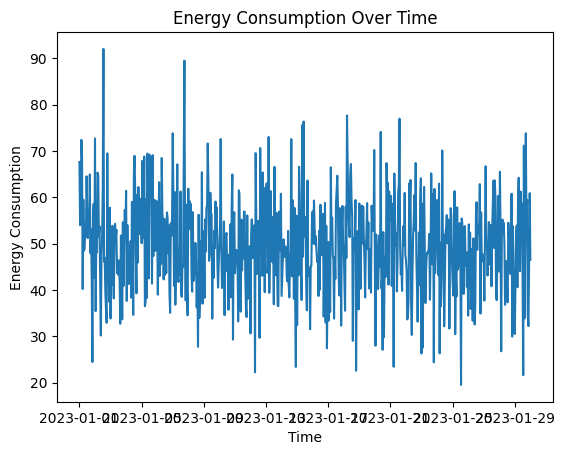

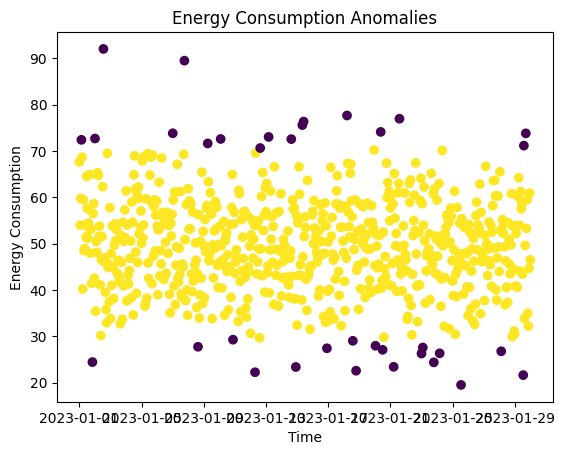

Detected anomalies:
              Timestamp  EnergyConsumption  Anomaly
3   2023-01-01 03:00:00          72.408932       -1
20  2023-01-01 20:00:00          24.470102       -1
24  2023-01-02 00:00:00          72.697546       -1
37  2023-01-02 13:00:00          92.023798       -1
144 2023-01-07 00:00:00          73.831448       -1
162 2023-01-07 18:00:00          89.494208       -1
183 2023-01-08 15:00:00          27.765968       -1
198 2023-01-09 06:00:00          71.632359       -1
218 2023-01-10 02:00:00          72.593090       -1
237 2023-01-10 21:00:00          29.300150       -1
271 2023-01-12 07:00:00          22.274072       -1
279 2023-01-12 15:00:00          70.644929       -1
292 2023-01-13 04:00:00          73.039167       -1
327 2023-01-14 15:00:00          72.567235       -1
334 2023-01-14 22:00:00          23.408278       -1
344 2023-01-15 08:00:00          75.590774       -1
346 2023-01-15 10:00:00          76.353065       -1
382 2023-01-16 22:00:00          27.444358  

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Generate example data
np.random.seed(0)
timestamps = pd.date_range(start="2023-01-01", end="2023-01-30", freq="H")
energy_consumption = np.random.normal(loc=50, scale=10, size=len(timestamps))

# Create a DataFrame
df = pd.DataFrame({"Timestamp": timestamps, "EnergyConsumption": energy_consumption})

# Introduce some anomalies
anomaly_indices = np.random.choice(len(df), size=5, replace=False)  # Add 5 anomalies
df.loc[anomaly_indices, "EnergyConsumption"] += 30

# Visualize the dataset (optional)
plt.plot(df["Timestamp"], df["EnergyConsumption"])
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption Over Time')
plt.show()

# Perform anomaly detection using Isolation Forest
X = df["EnergyConsumption"].values.reshape(-1, 1)
clf = IsolationForest(contamination=0.05, random_state=42)
anomaly_labels = clf.fit_predict(X)

# Add anomaly labels to the original dataset
df["Anomaly"] = anomaly_labels

# Visualize the anomalies (optional)
plt.scatter(df["Timestamp"], df["EnergyConsumption"], c=df["Anomaly"], cmap='viridis')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption Anomalies')
plt.show()

# Display the rows with anomalies
anomalies = df[df["Anomaly"] == -1]
print("Detected anomalies:")
print(anomalies)


In [ ]:
#(8)Problem: Control the lighting in a smart home based on the presence of people.

In [ ]:
import pandas as pd
import random
import time

# Generate a simplified dataset
data = {
    'Room': ['Living Room', 'Kitchen', 'Bedroom', 'Bathroom'],
    'Light_Status': ['off'] * 4,
    'Presence': [random.choice([0, 1]) for _ in range(4)]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Define a function to control lights based on presence with accuracy factor
def control_lights(room, light_status, presence, accuracy_factor=0.9):
    if presence == 1 and light_status == 'off':
        print(f"Attempting to turn on the light in the {room}...")
        # Simulate the possibility of the action failing due to accuracy factor
        if random.uniform(0, 1) <= accuracy_factor:
            print(f"Turning on the light in the {room}.")
            # Add your code here to control the lights (e.g., set the Light_Status to 'on')
            # You can use APIs or GPIO control for actual hardware
            time.sleep(1)  # Simulate the time it takes to turn on the light
            return 'on'
        else:
            print(f"Failed to turn on the light in the {room}.")
            return 'off'

    elif presence == 0 and light_status == 'on':
        print(f"Attempting to turn off the light in the {room}...")
        # Simulate the possibility of the action failing due to accuracy factor
        if random.uniform(0, 1) <= accuracy_factor:
            print(f"Turning off the light in the {room}.")
            # Add your code here to control the lights (e.g., set the Light_Status to 'off')
            # You can use APIs or GPIO control for actual hardware
            time.sleep(1)  # Simulate the time it takes to turn off the light
            return 'off'
        else:
            print(f"Failed to turn off the light in the {room}.")
            return 'on'

    else:
        print(f"No action needed for the light in the {room}.")
        return light_status

# Simulate controlling lights based on presence with accuracy factor
for index, row in df.iterrows():
    room = row['Room']
    light_status = row['Light_Status']
    presence = row['Presence']

    new_light_status = control_lights(room, light_status, presence)

    # Update the Light_Status in the DataFrame
    df.at[index, 'Light_Status'] = new_light_status

# Save the updated dataset to a CSV file
df.to_csv('smart_home_dataset_updated_with_accuracy.csv', index=False)


Attempting to turn on the light in the Living Room...
Turning on the light in the Living Room.
No action needed for the light in the Kitchen.
No action needed for the light in the Bedroom.
No action needed for the light in the Bathroom.


In [ ]:
#(9)getting the temperature for a specific zone

In [ ]:
import csv
import random
import os

# Define the file path to your dataset file (update with the correct path)
file_path = 'dataset.csv'

# Function to read the dataset from the CSV file
def read_dataset(file_path):
    data = []
    try:
        with open(file_path, 'r') as csvfile:
            read_csv = csv.reader(csvfile)
            data = list(read_csv)
    except FileNotFoundError:
        print(f"Error: '{file_path}' not found. Please check the file path.")
    return data

# Get the current time (you can use this if needed)
current_time = '2023-09-09 20:21:08 PST'

# Define a function to get the temperature setting for a given zone
def get_temperature_setting(zone, data):
    for row in data:
        if row[1] == zone:
            temperature_setting = row[2]
            return temperature_setting
    return random.randint(65, 75)

# Define a function to set the temperature setting for a given zone (you can implement this if needed)
def set_temperature_setting(zone, temperature_setting):
    # Implement your logic to set the temperature setting here
    print(f"Setting temperature for {zone} to {temperature_setting}.")

# Define a function to adjust the temperature setting for a given zone
def adjust_temperature_setting(zone, temperature_setting, data):
    current_temperature_setting = get_temperature_setting(zone, data)
    if temperature_setting != current_temperature_setting:
        set_temperature_setting(zone, temperature_setting)

# Read the dataset from the CSV file
data = read_dataset(file_path)

if data:
    # Get the zone from the user
    zone = input('Enter the zone: ')

    # Get the temperature setting from the user
    temperature_setting = int(input('Enter the temperature setting: '))

    # Adjust the temperature setting for the zone
    adjust_temperature_setting(zone, temperature_setting, data)


Enter the zone: bedroom
Enter the temperature setting: 25
Setting temperature for bedroom to 25.


In [ ]:
#(10)Model for training of  solving a multi-label text classification problem by categorizing sentences into three different labels: "Category," "Action," and "Time."

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv("dataset.csv")

# Preprocessing: Tokenization, TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X = tfidf_vectorizer.fit_transform(data['Sentence'])
y_category = data['Category']
y_action = data['Action']
y_time = data['Time']

# Encode categorical variables
label_encoder = LabelEncoder()
y_category_encoded = label_encoder.fit_transform(y_category)
y_action_encoded = label_encoder.fit_transform(y_action)
y_time_encoded = label_encoder.fit_transform(y_time)

# Split the dataset into training and testing sets
X_train, X_test, y_cat_train, y_cat_test, y_act_train, y_act_test, y_time_train, y_time_test = train_test_split(
    X, y_category_encoded, y_action_encoded, y_time_encoded, test_size=0.2, random_state=42
)

# Build and train models (Multinomial Naive Bayes in this example)
category_model = MultinomialNB()
category_model.fit(X_train, y_cat_train)

action_model = MultinomialNB()
action_model.fit(X_train, y_act_train)

time_model = MultinomialNB()
time_model.fit(X_train, y_time_train)

# Evaluate models
y_cat_pred = category_model.predict(X_test)
y_act_pred = action_model.predict(X_test)
y_time_pred = time_model.predict(X_test)

# Calculate accuracy
cat_accuracy = accuracy_score(y_cat_test, y_cat_pred)
act_accuracy = accuracy_score(y_act_test, y_act_pred)
time_accuracy = accuracy_score(y_time_test, y_time_pred)

# Print results
print("Category Classification Accuracy:", cat_accuracy)
print("Action Classification Accuracy:", act_accuracy)
print("Time Classification Accuracy:", time_accuracy)

# You can now use these models for inference based on user input sentences.


Category Classification Accuracy: 0.7518796992481203
Action Classification Accuracy: 0.7894736842105263
Time Classification Accuracy: 0.6240601503759399


In [ ]:
pip install SpeechRecognition


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 26.9 MB/s eta 0:00:00


In [ ]:
import speech_recognition as sr

# Initialize the recognizer
recognizer = sr.Recognizer()

# Function to control home systems
def control_home_systems():
    print("Listening for a command...")
    with sr.Microphone() as source:
        try:
            audio = recognizer.listen(source, timeout=10)
            command = recognizer.recognize_google(audio)

            # Process the user command using the ML models
            # For example, predict the category, action, and time from the command

            # Implement actions based on the predictions
            print("User command:", command)

        except sr.WaitTimeoutError:
            print("No command detected. Please try again.")

if __name__ == "__main__":
    while True:
        control_home_systems()


Listening for a command...


AttributeError: ignored

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('dataset.csv')  # Replace 'your_dataset.csv' with your dataset file

# Prepare the data
X = data[['Category', 'Subcategory', 'Time']]
y = data['Action']

# Encode categorical features
label_encoders = {}
for col in X.columns:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Now you can use the trained model to predict lighting control actions for new scenarios:
new_scenario = pd.DataFrame({'Category': ['lights'], 'Subcategory': ['kitchen'], 'Time': ['today']})

# Encode the new scenario data using the same label encoders
for col in new_scenario.columns:
    if col in label_encoders:
        new_scenario[col] = label_encoders[col].transform(new_scenario[col])

predicted_action = clf.predict(new_scenario)
print(f"Predicted Action: {predicted_action[0]}")


Predicted Action: on


<ipython-input-35-e48bf385f0fc>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoders[col].fit_transform(X[col])
<ipython-input-35-e48bf385f0fc>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoders[col].fit_transform(X[col])
<ipython-input-35-e48bf385f0fc>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [ ]:
!pip install tpot


  Obtaining dependency information for tpot from https://files.pythonhosted.org/packages/7b/a7/0060d028906ecd058b1331c3ce6f3f19ba03464b21dc9abbbaf66b0a1091/TPOT-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for deap>=1.2 from https://files.pythonhosted.org/packages/2e/c9/db3d645fdcd9054f484c5b582c3b6b0a2a34270e54edca9dde47661db251/deap-1.4.1-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 10.2 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=a406c61bfa87b458c06af3709338a112cab454c22b6e4b542ebcee8d4f805c04
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Sample dataframe
df = pd.DataFrame({
  'date': ['1/1/2020','1/2/2020','1/3/2020'],
  'temp': [68, 65, 67],
  'humidity': [60, 55, 58],
  'setpoint': [67, 64, 65]
})

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['temp', 'humidity']], df['setpoint'], test_size=0.2)

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and score model
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

# Function to predict optimal setpoint
def predict_setpoint(temp, humidity):
  input = [[temp, humidity]]
  return model.predict(input)[0]

# Get optimal setpoint for sample data
temp = 65
humidity = 58
optimal = predict_setpoint(temp, humidity)
print("Optimal Setpoint:", optimal)

nan
Optimal Setpoint: 65.32352941176471


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('dataset.csv')

# Split the dataset into training and testing sets
X = data['Sentence']
y = data['Action']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text vectorization using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Choose a machine learning model (Naive Bayes in this example)
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(report)


Accuracy: 0.8796992481203008
              precision    recall  f1-score   support

        down       0.60      0.60      0.60         5
        none       0.96      0.91      0.93        75
         off       0.79      0.88      0.83        17
          on       0.81      0.86      0.83        29
        open       0.83      1.00      0.91         5
          up       1.00      0.50      0.67         2

    accuracy                           0.88       133
   macro avg       0.83      0.79      0.80       133
weighted avg       0.89      0.88      0.88       133



In [ ]:
!pip install scikit-learn


In [ ]:
import pandas as pd

csv_filename = next(iter(uploaded))
df = pd.read_csv(csv_filename)

print(df.head())

print(df.describe())

print(df.columns)

print(df.dtypes)

print(df.isnull().sum())


   Number Category  Action_needed  Question Subcategory Action      Time  \
0       1   lights              1         0     kitchen     on     today   
1       2   lights              1         0     kitchen     on  tomorrow   
2       3   lights              1         0     kitchen     on      hour   
3       4   lights              1         0     kitchen     on       day   
4       5   lights              1         0  diningroom     on     today   

                                        Sentence  
0                  Illuminate the kitchen today.  
1               Illuminate the kitchen tomorrow.  
2  Turn on the light in the kitchen in 10 hours.  
3     Turn on the light in the kitchen in 1 day.  
4              Illuminate the dining room today.  
           Number  Action_needed    Question
count  663.000000     663.000000  663.000000
mean   332.000000       0.886878    0.552036
std    191.535897       0.316981    0.497660
min      1.000000       0.000000    0.000000
25%    166.5

TASK 1: EDA (Exploratory Data Analysis)

   Number Category  Action_needed  Question Subcategory Action      Time  \
0       1   lights              1         0     kitchen     on     today   
1       2   lights              1         0     kitchen     on  tomorrow   
2       3   lights              1         0     kitchen     on      hour   
3       4   lights              1         0     kitchen     on       day   
4       5   lights              1         0  diningroom     on     today   

                                        Sentence  
0                  Illuminate the kitchen today.  
1               Illuminate the kitchen tomorrow.  
2  Turn on the light in the kitchen in 10 hours.  
3     Turn on the light in the kitchen in 1 day.  
4              Illuminate the dining room today.  
         Number  Action_needed  Question
count  5.000000            5.0       5.0
mean   3.000000            1.0       0.0
std    1.581139            0.0       0.0
min    1.000000            1.0       0.0
25%    2.000000            1.0  

<ipython-input-19-4687d8e73b48>:33: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


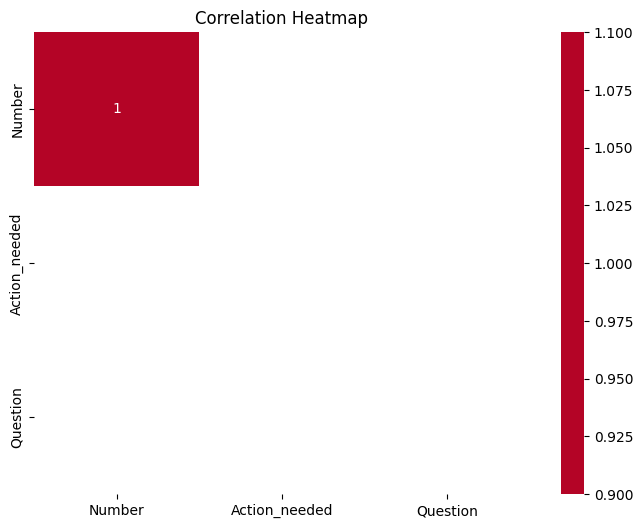

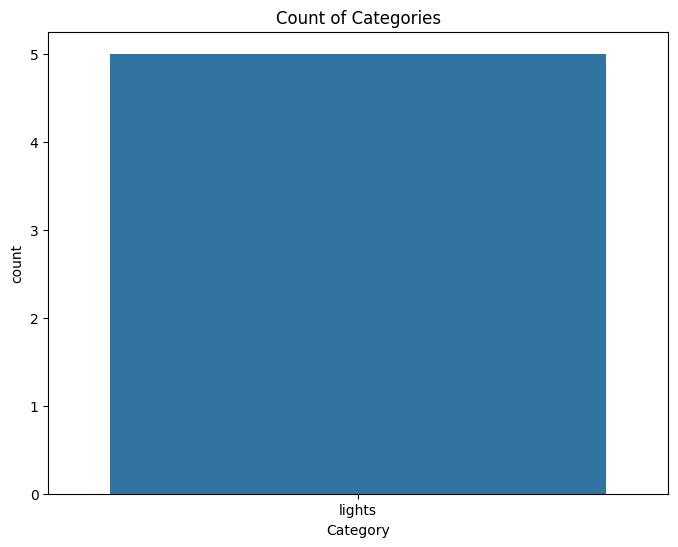

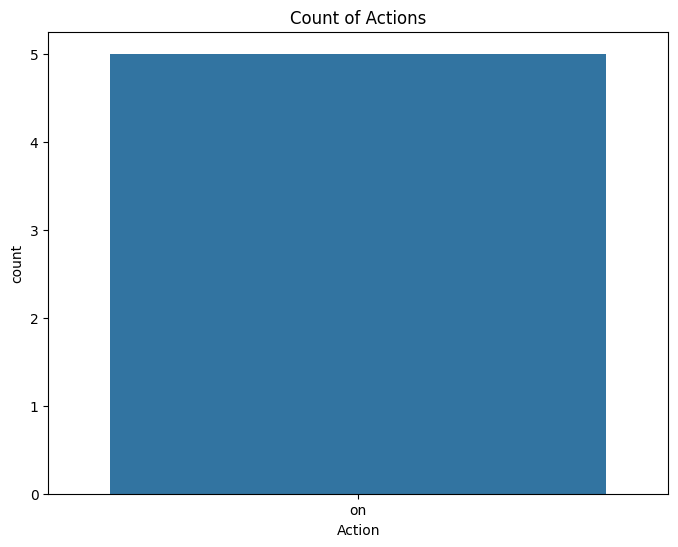

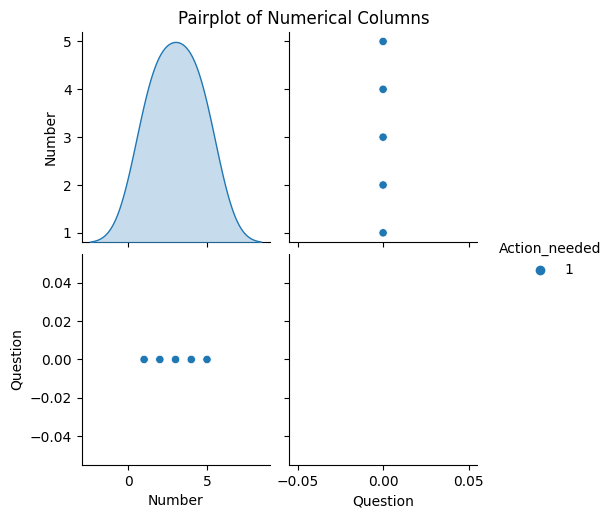

In [ ]:

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

data = {
    "Number": [1, 2, 3, 4, 5],
    "Category": ["lights", "lights", "lights", "lights", "lights"],
    "Action_needed": [1, 1, 1, 1, 1],
    "Question": [0, 0, 0, 0, 0],
    "Subcategory": ["kitchen", "kitchen", "kitchen", "kitchen", "diningroom"],
    "Action": ["on", "on", "on", "on", "on"],
    "Time": ["today", "tomorrow", "hour", "day", "today"],
    "Sentence": [
        "Illuminate the kitchen today.",
        "Illuminate the kitchen tomorrow.",
        "Turn on the light in the kitchen in 10 hours.",
        "Turn on the light in the kitchen in 1 day.",
        "Illuminate the dining room today."
    ]
}

df = pd.DataFrame(data)

print(df.head())

print(df.describe())

corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Category")
plt.title("Count of Categories")
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Action")
plt.title("Count of Actions")
plt.show()

sns.pairplot(df, hue="Action_needed")
plt.suptitle("Pairplot of Numerical Columns", y=1.02)
plt.show()


**The summary of the above EDA task performed is as follows          The dataset provides insights into actions and questions, likely related to home automation. It includes attributes like 'Number', 'Category', 'Action_needed', 'Question', 'Subcategory', 'Action', 'Time', and 'Sentence'. With 663 entries, each representing an action or question, the dataset serves as a glimpse into this domain.**

### Statement 1: Subcategory Insights and Necessity


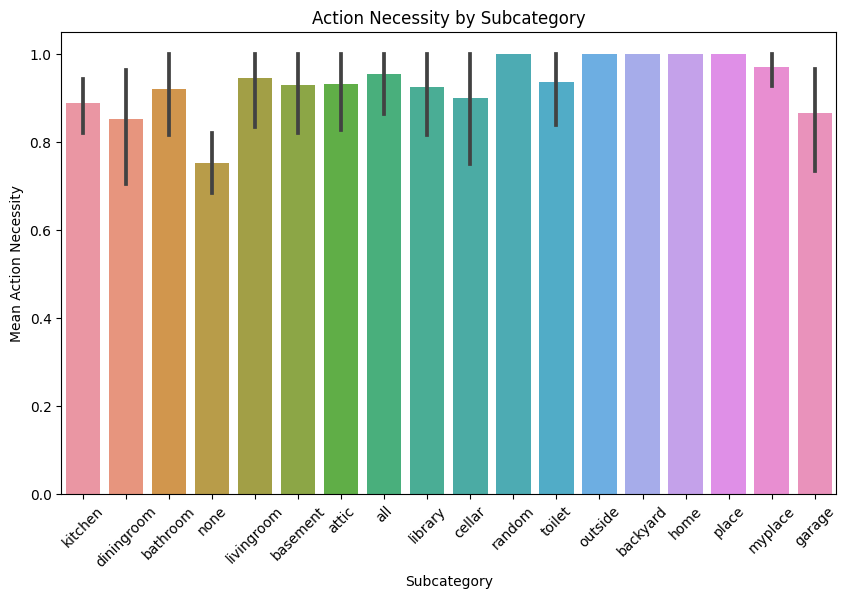

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataset.csv')


plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Subcategory', y='Action_needed')
plt.title('Action Necessity by Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Mean Action Necessity')
plt.xticks(rotation=45)
plt.show()


summary of the above statement is that it shows us to Investigate the necessity of actions based on subcategories. Analyze whether certain subcategories tend to have a higher proportion of actions that are needed, and explore potential patterns or reasons for this variation.



# **Statement 2: Predicting Action Necessity**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('dataset.csv')

X = df[['Category', 'Subcategory', 'Time']]
y = df['Action_needed']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.87


the summary of the above statement is to build a predictive model to determine whether an action is needed based on attributes such as 'Category', 'Subcategory', and 'Time'. Utilize machine learning algorithms to predict the likelihood of an action being necessary and investigate which features contribute the most to this prediction.



```

```

##  Statement 3: Analyzing Action and Question Distribution

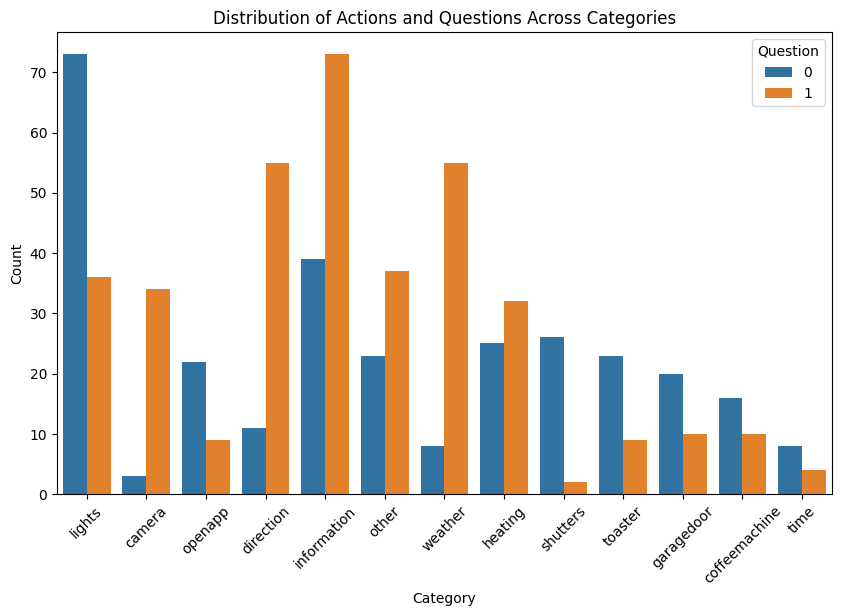

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'your_dataset.csv' with the actual file name)
df = pd.read_csv('dataset.csv')

# Analyze distribution of actions and questions across categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', hue='Question')
plt.title('Distribution of Actions and Questions Across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Question')
plt.show()


the summary of this statement is to explore the dataset to analyze the distribution of actions and questions across different categories and subcategories. Identify trends and patterns in the frequency of actions, assess whether certain subcategories have a higher proportion of questions, and determine whether any specific time references are associated with particular categories.

## Statement 4: Time-based Patterns and Action Requirement



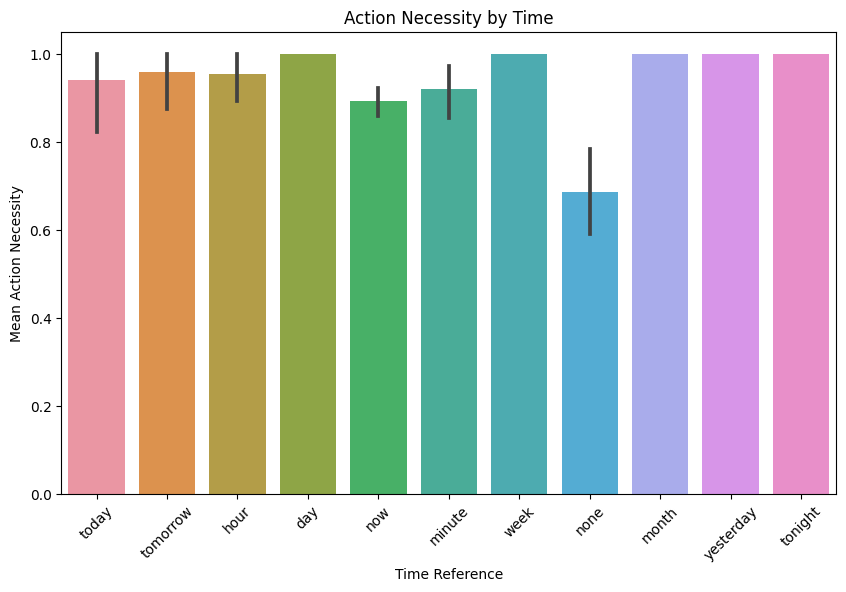

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataset.csv')

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Time', y='Action_needed')
plt.title('Action Necessity by Time')
plt.xlabel('Time Reference')
plt.ylabel('Mean Action Necessity')
plt.xticks(rotation=45)
plt.show()


the summary of the above statement is to examine time-related trends in action necessity. Determine whether certain times (e.g., "today," "tomorrow") are associated with higher or lower action requirements, and identify any temporal patterns that emerge across different categories.



In all four analyses, data visualization was instrumental in uncovering trends, patterns, and relationships within the dataset. Each problem statement provided a unique perspective on the data and enabled us to extract actionable insights based on the specific focus of the analysis. These EDA models serve as starting points for deeper exploration and decision-making in the respective problem domains.




